# Description
This notebook is showing how Simulation API could be used in a notebook style. The short notebook is displaying how to create a simulation and visualize its report

In [26]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from collections import namedtuple

In [27]:
url = "http://78.47.131.57:8080"

In [28]:
report_url = url + '/report'

# Read Report

In [29]:
querystring = {"runtime_id": "4470ccb43c6511eaa247acde48001122"}

In [30]:
response = requests.request("GET", report_url, params=querystring)
response # should be <Response [200]>

<Response [200]>

In [31]:
report = json.loads(response.text, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))

## Data extracted

In [32]:
servers = report.report
servers[0].name

'App Server 1'

In [36]:
df_list = []
for server in servers:
    print(server.name)
    for component in server.metrics:
        df = pd.DataFrame(component, columns=["step", "cpu_usage", "queue"])
        df_list.append(df)

App Server 1
DB Server 1


In [39]:
df_list[0]

,step,cpu_usage,queue
0,1.010453,0,0
1,1.010477,1,0
2,1.011183,2,0
3,1.011755,1,0
4,1.011786,2,0
...,...,...,...
14323,8.299562,5,0
14324,8.610382,4,0
14325,9.083461,3,0
14326,10.010680,2,0


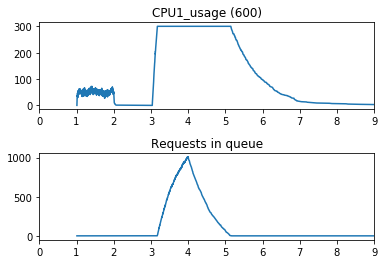

In [34]:
data_frame = df_list[0]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU1_usage (600)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

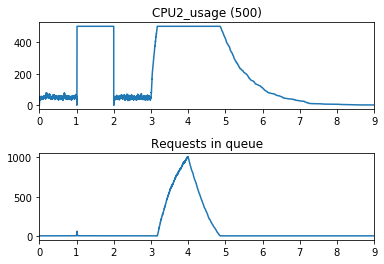

In [35]:
data_frame = df_list[1]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU2_usage (500)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)